## We Should NoT create the demand every time. That's the reason I created the demand once and then save it in a pickle file.

- Lostsales vs backorder
- Max (FR) vs Max(Profit)


In [3]:
import scipy as sp
import scipy.stats as spt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import pickle

# importing the export_png() function
from bokeh.io import export_png

ModuleNotFoundError: No module named 'bokeh'

In [4]:
k = 100
ent = 0
p=10
h=0.005
s=0.005
w=p*0.6

policy=['P','L', 'U', 'R', 'Lx']

uniform_min = 0
uniform_max = k * 1.2
sample_size = 1000
#sample_size = 5000



In [23]:
# Demands ###### USE THIS IF ONLY DEMANDS are generated for the first time.

#d1 = spt.uniform.rvs(loc=uniform_min, scale=uniform_min+uniform_max, size=sample_size, random_state=None)
#d2 = spt.uniform.rvs(loc=uniform_min, scale=uniform_min+uniform_max, size=sample_size, random_state=None)

#with open('demand.pickle', 'wb') as f:
    #pickle.dump([d1,d2], f)

In [38]:
with open('demand.pickle', 'rb') as f:
    [d1,d2] = pickle.load(f)

#### Capacity Allocation Policies

In [16]:
import math
k=9
demands = [(8, 5), (6, 3), (2, 6), (6, 3), (4, 7), (4, 5), (3, 9), (8, 2), (8, 3), (6, 6)]
def proportional(x1,x2):
    return math.floor(min(x1,k*x1/(x1+x2))), math.floor(min(x2,k*x2/(x1+x2)))

In [17]:
allocations = [proportional(x[0],x[1]) for x in demands]
allocations

[(5, 3),
 (6, 3),
 (2, 6),
 (6, 3),
 (3, 5),
 (4, 5),
 (2, 6),
 (7, 1),
 (6, 2),
 (4, 4)]

In [19]:
fr_1 = round(sum([y[0] for y in allocations]) / sum([x[0] for x in demands]),2)
fr_2 = round(sum([y[1] for y in allocations]) / sum([x[1] for x in demands]),2)
print(fr_1)
print(fr_2)

0.82
0.78


In [10]:
proportional(60,70)

(46, 53)

In [6]:
def linear(x1,x2):
    d=[x1,x2]
    d_sorted = np.sort(d)[::-1]
    sort_index_d = np.argsort(d)[::-1]
    g_linear=[-1,-1]
    test=0

    for n in range (2,0,-1):
        if test==0:
            for i in range(2,0,-1):
                if i <= n:
                    #print("n=",n)
                    g_linear[i-1] = d[sort_index_d[i-1]]-(1/n)*max(0,sum(d_sorted[:n])-k)
                    #print(g_linear[i-1])
                else:
                    g_linear[i-1] = 0
                    #print(g_linear[i-1])
            if np.prod(g_linear) >= 0:
            #if g_linear[0] >= 0 and g_linear[1] >= 0:
                test=1
    if d[0] < d[1]:
        g_linear[0], g_linear[1] = g_linear[1], g_linear[0]
    return g_linear

In [7]:
def uniform(x1,x2):
    d=[x1,x2]
    #d_sorted = np.sort(d)[::-1]
    d_sorted = np.sort(d)
    sort_index_d = np.argsort(d)[::-1]
    g_linear=[-1,-1]
    test=0

    for n in range (2,-1,-1):
        if test==0:
            for i in range(2,0,-1):
                if i <= n:
                    #print("n=",n)
                    if n < 2:
                        sm=sum(d_sorted[:n])
                    else:
                        sm=0
                    g_linear[i-1] = (1/n)*(k-sm)
                    #print(g_linear[i-1])
                else:
                    g_linear[i-1] = d[sort_index_d[i-1]]
                    #print(g_linear[i-1])
            if g_linear[0] <= d[sort_index_d[0]] and g_linear[1] <= d[sort_index_d[1]]:
                test=1
    if d[0] < d[1]:
        g_linear[0], g_linear[1] = g_linear[1], g_linear[0]
    return g_linear

In [8]:
uniform(40,70)

[40, 60.0]

In [9]:
linear(70,90)

[40.0, 60.0]

In [10]:
def relaxed_linear(x1,x2):
    d=[x1,x2]
    g_linear=[-1,-1]
    g_linear[0] = min(d[0], d[0]-(1/2)*(sum(d)-k))
    g_linear[1] = min(d[1], d[1]-(1/2)*(sum(d)-k))

    return g_linear

In [11]:
relaxed_linear(700,90) # As Cachon said, this policy sometimes gives negative allocations!!!

[355.0, -255.0]

In [12]:
def lexicographic(x1,x2):
    d=[x1,x2]
    g_linear=[-1,-1]
    if d[0] >= k:
        g_linear[0] = k
    else:
        g_linear[0] = d[0]

    if d[1] >= k-g_linear[0]:
        g_linear[1] = k-g_linear[0]
    else:
        g_linear[1] = d[1]

    return g_linear

#### Main Function

In [13]:
def origin_updated(ent):
    shortage_max=0
    
    q1_quant = d1*np.cosh(ent)+d2*np.sinh(ent)
    q2_quant = d2*np.cosh(ent)+d1*np.sinh(ent)
    
    if quant1==1:
        order1=q1_quant
    else:
        order1=d1
        
    if quant2==1:
        order2=q2_quant
    else:
        order2=d2
    
    if policy_selected=='P':
        g1_quant = [proportional(order1[cc],order2[cc]) for cc in range(sample_size)]
        g2_quant = [proportional(order2[cc],order1[cc]) for cc in range(sample_size)]
    
    if policy_selected=='L':
        g1_quant = [linear(order1[cc],order2[cc])[0] for cc in range(sample_size)]
        g2_quant = [linear(order1[cc],order2[cc])[1] for cc in range(sample_size)]
        
    if policy_selected=='U':
        g1_quant = [uniform(order1[cc],order2[cc])[0] for cc in range(sample_size)]
        g2_quant = [uniform(order1[cc],order2[cc])[1] for cc in range(sample_size)]
        
    if policy_selected=='R':
        g1_quant = [relaxed_linear(order1[cc],order2[cc])[0] for cc in range(sample_size)]
        g2_quant = [relaxed_linear(order1[cc],order2[cc])[1] for cc in range(sample_size)]
    
    if policy_selected=='Lx':
        g1_quant = [lexicographic(order1[cc],order2[cc])[0] for cc in range(sample_size)]
        g2_quant = [lexicographic(order1[cc],order2[cc])[1] for cc in range(sample_size)]

    
    fr_quant_1 = round(sum(g1_quant)/sum(d1)*100,1)
    fr_quant_2 = round(sum(g2_quant)/sum(d2)*100,1)
    
    #fr_quant_1 = round(sum(g1_quant)/sum(order1)*100,1)
    #fr_quant_2 = round(sum(g2_quant)/sum(order2)*100,1)
    
    balance1=g1_quant - d1
    holding1 = [sum(balance1[:j+1]) if sum(balance1[:j+1]) > 0 else 0 for j in range(len(balance1))]
    shortage1 = [sum(balance1[:j+1]) if sum(balance1[:j+1]) < 0 else 0 for j in range(len(balance1))] #Not LOST Sales
    holding1_avr = sum(holding1)/sample_size
    shortage1_avr = -1*sum(shortage1)/sample_size
    
    balance2=g2_quant - d2
    holding2 = [sum(balance2[:j+1]) if sum(balance2[:j+1]) > 0 else 0 for j in range(len(balance2))]
    shortage2 = [sum(balance2[:j+1]) if sum(balance2[:j+1]) < 0 else 0 for j in range(len(balance2))] #Not LOST Sales
    holding2_avr = sum(holding2)/sample_size
    shortage2_avr = -1*sum(shortage2)/sample_size
    
    sale1_avr = min(sum(g1_quant),sum(d1))/sample_size     #Our case is not lost sales. So, the total sum is compared.
    sale2_avr = min(sum(g2_quant),sum(d2))/sample_size

    profit1_quant_avr = round(sale1_avr*p - (sum(g1_quant)/sample_size)*w - shortage1_avr*s - holding1_avr*h,0)
    profit2_quant_avr = round(sale2_avr*p - (sum(g2_quant)/sample_size)*w - shortage2_avr*s - holding2_avr*h,0)

    
    return fr_quant_1, shortage1_avr*s, holding1_avr*h, profit1_quant_avr, fr_quant_2, shortage2_avr*s, holding2_avr*h, profit2_quant_avr

In [14]:
def result_selector(item):
    switcher = {
        0: 'policy selected',
        1: 'Fill Rate Buyer 1',
        2: 'Shortage Cost Buyer 1',
        3: 'Holding Cost Buyer 1',
        4: 'Profit Buyer 1',
        5: 'Fill Rate Buyer 2',
        6: 'Shortage Cost Buyer 2',
        7: 'Holding Cost Buyer 2',
        8: 'Profit Buyer 2',
    }
    return (switcher.get(item, "Invalid Result Item"))

### No Strategic Reasoning

In [24]:
#uniform_min = 0
#uniform_max = 100 * 1.2
#sample_size = 1000

# Demands
#d1 = spt.uniform.rvs(loc=uniform_min, scale=uniform_min+uniform_max, size=sample_size, random_state=None)
#d2 = spt.uniform.rvs(loc=uniform_min, scale=uniform_min+uniform_max, size=sample_size, random_state=None)
        
k_min = 50
k_max = 140        
k_range = np.arange(k_min, k_max, 1)
result = []
m=9
n=5
result=[[0] * m for i in range(n)] #creating n*m dimensions list in Python
nn=0

for policy_selected in policy:
    print(policy_selected)
    fr_1_arr = [0]*len(k_range)
    short1_arr = [0]*len(k_range)
    holding1_arr = [0]*len(k_range)
    profit1_arr = [0]*len(k_range)
    fr_2_arr = [0]*len(k_range)
    short2_arr = [0]*len(k_range)
    holding2_arr = [0]*len(k_range)
    profit2_arr = [0]*len(k_range)
    i=0
    
    quant1=0
    quant2=0

    
    for k in k_range:
        fr_1_arr[i], short1_arr[i], holding1_arr[i], profit1_arr[i], fr_2_arr[i], short2_arr[i], holding2_arr[i], profit2_arr[i] = origin_updated(0)
        i=i+1
    
    result[nn][0] = policy_selected
    result[nn][1] = fr_1_arr
    result[nn][2] = short1_arr
    result[nn][3] = holding1_arr
    result[nn][4] = profit1_arr
    
    result[nn][5] = fr_2_arr
    result[nn][6] = short2_arr
    result[nn][7] = holding2_arr
    result[nn][8] = profit2_arr
    
    nn=nn+1

P
L
U
R
Lx


In [95]:
#with open('results_NoReasoning.pickle', 'wb') as f:
    #pickle.dump([result], f)


In [16]:
with open('results_NoReasoning.pickle', 'rb') as f:
    [result] = pickle.load(f)

In [25]:
item = 4
consider_minmax = 0
y_min = -115
y_max = 255
%run Bokeh_NoStrategic.ipynb

Loading BokehJS ...

In [115]:
'Original_'+result_selector(item).replace(" ", "_")

'Original_Profit_Buyer_1'

In [119]:
item = 8
%run Bokeh_NoStrategic.ipynb

Loading BokehJS ...

In [117]:
'Original_'+result_selector(item).replace(" ", "_")

'Original_Profit_Buyer_2'

#### Quantum

In [26]:
k = 100
ent = 0
p=10
h=0.005
s=0.005
w=p*0.6

policy=['P','L', 'U', 'R', 'Lx']

In [27]:
q1_quant = d1*np.cosh(ent)+d2*np.sinh(ent)
q2_quant = d2*np.cosh(ent)+d1*np.sinh(ent)

In [28]:
g1_quant = [proportional(q1_quant[cc],q2_quant[cc]) for cc in range(sample_size)]
g2_quant = [proportional(q2_quant[cc],q1_quant[cc]) for cc in range(sample_size)]

In [29]:
fr_quant_1 = round(sum(g1_quant)/sum(d1)*100,1)
fr_quant_2 = round(sum(g2_quant)/sum(d2)*100,1)
fr_quant_1

73.9

In [30]:
data = {'fr_origin_1': [fr_origin_1], 
        'fr_origin_2': [fr_origin_2],
        'fr_quant_1': [fr_quant_1],
        'fr_quant_2': [fr_quant_2]
       }


df = pd.DataFrame(data=data, index=['Row0'])
df

NameError: name 'fr_origin_1' is not defined

In [31]:
data = {'d1': d1, 
        'd2': d2,
        'g1_origin': g1_origin,
        'g2_origin': g2_origin,
        'q1_quant': q1_quant,
        'q2_quant': q2_quant,
        'g1_quant': g1_quant,
        'g2_quant': g2_quant
       }


df_raw = pd.DataFrame(data=data)
df_raw.head()

NameError: name 'g1_origin' is not defined

#### Prime

- We may consider the 'prime' in the code below for the case that minimum of demand and allocated stock is considered for computing the fill rate.
Reasult shows that the fill rate decreases even from the original (no quantum) state.

In [32]:
g1_quant1_prime = [min(g1_quant[cc],d1[cc]) for cc in range(sample_size)]
g1_quant2_prime = [min(g1_quant[cc],d1[cc]) for cc in range(sample_size)]
fr_quant1_prime = round(sum(g1_quant1_prime)/sum(d1)*100,1)
fr_quant2_prime = round(sum(g1_quant2_prime)/sum(d2)*100,1)

In [33]:
data = {'fr_origin_1': [fr_origin_1], 
        'fr_origin_2': [fr_origin_2],
        'fr_quant_1': [fr_quant_1],
        'fr_quant_2': [fr_quant_2],
        'fr_quant1_prime': [fr_quant1_prime],
        'fr_quant2_prime': [fr_quant2_prime]
       }


df = pd.DataFrame(data=data, index=['Row0'])
df

NameError: name 'fr_origin_1' is not defined

The excess amount received in this period will be used to fullfill the demand of the next periods as generally the shortage is higher than the excess (holding).

In [34]:
data = {'d1': d1, 
        'd2': d2,
        'q1_quant': q1_quant,
        'q2_quant': q2_quant,
        'g1_quant': g1_quant,
        'g2_quant': g2_quant
       }


df_raw = pd.DataFrame(data=data)
df_raw.head()

,d1,d2,q1_quant,q2_quant,g1_quant,g2_quant
0,2.931998,48.269743,2.931998,48.269743,2.931998,48.269743
1,113.762052,85.122560,113.762052,85.122560,57.200027,42.799973
2,1.209665,82.186447,1.209665,82.186447,1.209665,82.186447
3,78.952595,100.808301,78.952595,100.808301,43.920895,56.079105
4,107.527437,28.562880,107.527437,28.562880,79.011821,20.988179


In [38]:
def policy_selector(pol):
    switcher = {
        'P': 0,
        'L': 1,
        'U': 2,
        'R': 3,
        'Lx': 4
    }
    return (switcher.get(pol, "Invalid Policy"))

In [35]:
gamma = np.arange(0, (np.pi/3)+0.05, 0.05)
result = []
m=9
n=5
result=[[0] * m for i in range(n)] #creating n*m dimensions list in Python
nn=0

for policy_selected in policy:
    fr_1_arr = [0]*len(gamma)
    short1_arr = [0]*len(gamma)
    holding1_arr = [0]*len(gamma)
    profit1_arr = [0]*len(gamma)
    fr_2_arr = [0]*len(gamma)
    short2_arr = [0]*len(gamma)
    holding2_arr = [0]*len(gamma)
    profit2_arr = [0]*len(gamma)
    i=0
    
    quant1=1
    quant2=0

    
    for ent in gamma:
        fr_1_arr[i], short1_arr[i], holding1_arr[i], profit1_arr[i], fr_2_arr[i], short2_arr[i], holding2_arr[i], profit2_arr[i] = origin_updated(ent)
        i=i+1
        
    
    result[nn][0] = policy_selected
    result[nn][1] = fr_1_arr
    result[nn][2] = short1_arr
    result[nn][3] = holding1_arr
    result[nn][4] = profit1_arr
    
    result[nn][5] = fr_2_arr
    result[nn][6] = short2_arr
    result[nn][7] = holding2_arr
    result[nn][8] = profit2_arr
    
    nn=nn+1

In [122]:
with open('results_one_quantum.pickle', 'wb') as f:
    pickle.dump([result], f)

In [297]:
with open('results_one_quantum.pickle', 'rb') as f:
    [result] = pickle.load(f)

In [36]:
item = 4

horzontal_line_100 = 0

consider_minmax = 0
y_min = -5
y_max = 140

%run Bokeh_Quantum.ipynb

Loading BokehJS ...

In [149]:
'q1_'+result_selector(item).replace(" ", "_")

'q1_Profit_Buyer_1'

In [150]:
item = 8
%run Bokeh_Quantum.ipynb

Loading BokehJS ...

In [151]:
'q1_'+result_selector(item).replace(" ", "_")

'q1_Profit_Buyer_2'

### Find Maximum/ Minimum Values

In [176]:
pol_= 1
item_=8
result[pol_][item_]

[132.0,
 124.0,
 115.0,
 106.0,
 96.0,
 85.0,
 74.0,
 62.0,
 49.0,
 36.0,
 22.0,
 8.0,
 -6.0,
 -20.0,
 -33.0,
 -46.0,
 -58.0,
 -69.0,
 -79.0,
 -88.0,
 -97.0,
 -105.0]

In [170]:
max(result[pol_][item_])

216.0

In [171]:
result[pol_][item_].index(max(result[pol_][item_]))

21

In [172]:
gamma[result[pol_][item_].index(max(result[pol_][item_]))]

1.05

In [175]:
np.pi/3

1.0471975511965976

In [177]:
gamma[result[pol_][item_].index(-6)]

0.6000000000000001

### Two Quantum Players

In [39]:
k_min = 50
#k_max = 140
k_max = 200      
k_range = np.arange(k_min, k_max, 1)
result = []
m=9
n=5
kk=2 #0 for non-quantum 1 for quantum
#result=[[0] * m for i in range(n)] #creating n*m dimensions list in Python
result=[[[0] * m for i in range(n)] for i in range(kk)]
nn=0

for policy_selected in policy:
    print(policy_selected)
    fr_1_arr = [0]*len(k_range)
    short1_arr = [0]*len(k_range)
    holding1_arr = [0]*len(k_range)
    profit1_arr = [0]*len(k_range)
    fr_2_arr = [0]*len(k_range)
    short2_arr = [0]*len(k_range)
    holding2_arr = [0]*len(k_range)
    profit2_arr = [0]*len(k_range)
    
    q_fr_1_arr = [0]*len(k_range)
    q_short1_arr = [0]*len(k_range)
    q_holding1_arr = [0]*len(k_range)
    q_profit1_arr = [0]*len(k_range)
    q_fr_2_arr = [0]*len(k_range)
    q_short2_arr = [0]*len(k_range)
    q_holding2_arr = [0]*len(k_range)
    q_profit2_arr = [0]*len(k_range)
    
    i=0

    
    for k in k_range:
        quant1=0
        quant2=0
        fr_1_arr[i], short1_arr[i], holding1_arr[i], profit1_arr[i], fr_2_arr[i], short2_arr[i], holding2_arr[i], profit2_arr[i] = origin_updated(0)
        quant1=1
        quant2=1
        q_fr_1_arr[i], q_short1_arr[i], q_holding1_arr[i], q_profit1_arr[i], q_fr_2_arr[i], q_short2_arr[i], q_holding2_arr[i], q_profit2_arr[i] = origin_updated(np.pi/6)
        i=i+1
    
    result[0][nn][0] = policy_selected
    result[0][nn][1] = fr_1_arr
    result[0][nn][2] = short1_arr
    result[0][nn][3] = holding1_arr
    result[0][nn][4] = profit1_arr
    
    result[0][nn][5] = fr_2_arr
    result[0][nn][6] = short2_arr
    result[0][nn][7] = holding2_arr
    result[0][nn][8] = profit2_arr
    
    result[1][nn][0] = policy_selected
    result[1][nn][1] = q_fr_1_arr
    result[1][nn][2] = q_short1_arr
    result[1][nn][3] = q_holding1_arr
    result[1][nn][4] = q_profit1_arr
    
    result[1][nn][5] = q_fr_2_arr
    result[1][nn][6] = q_short2_arr
    result[1][nn][7] = q_holding2_arr
    result[1][nn][8] = q_profit2_arr
    
    nn=nn+1

P
L
U
R
Lx


In [41]:
item = 4
consider_minmax = 0
y_min = -115
y_max = 255
%run Bokeh_Combined.ipynb

Loading BokehJS ...

### Sensitivity Analysis on Ratio of shortage cost to holding cost

In [50]:
np.arange(0.005,0.021,0.005)

array([0.005, 0.01 , 0.015, 0.02 ])

In [51]:
shoratge_cost=np.arange(0.005,0.021,0.005)
for short in shoratge_cost:
    print(short)

0.005
0.01
0.015
0.02


In [62]:
test1, test2 = ["One", "Two", "Three"], ["1", "2", "3"]
saveObject = (test1, test2)
saveObject.append(['a','b'])

AttributeError: 'tuple' object has no attribute 'append'

In [119]:
SaveObject_tuple = () #For the Pickle package, we can add all objects to a Tuple and save it
policy=['P','L', 'U']
shoratge_cost=np.arange(0.005,0.021,0.005)
for short in shoratge_cost:
    s=short
    k_min = 50
    #k_max = 140
    k_max = 200      
    k_range = np.arange(k_min, k_max, 1)
    result = []
    m=9
    n=5
    kk=2 #0 for non-quantum 1 for quantum
    #result=[[0] * m for i in range(n)] #creating n*m dimensions list in Python
    result=[[[0] * m for i in range(n)] for i in range(kk)]
    nn=0

    for policy_selected in policy:
        print(policy_selected)
        fr_1_arr = [0]*len(k_range)
        short1_arr = [0]*len(k_range)
        holding1_arr = [0]*len(k_range)
        profit1_arr = [0]*len(k_range)
        fr_2_arr = [0]*len(k_range)
        short2_arr = [0]*len(k_range)
        holding2_arr = [0]*len(k_range)
        profit2_arr = [0]*len(k_range)

        q_fr_1_arr = [0]*len(k_range)
        q_short1_arr = [0]*len(k_range)
        q_holding1_arr = [0]*len(k_range)
        q_profit1_arr = [0]*len(k_range)
        q_fr_2_arr = [0]*len(k_range)
        q_short2_arr = [0]*len(k_range)
        q_holding2_arr = [0]*len(k_range)
        q_profit2_arr = [0]*len(k_range)

        i=0


        for k in k_range:
            quant1=0
            quant2=0
            fr_1_arr[i], short1_arr[i], holding1_arr[i], profit1_arr[i], fr_2_arr[i], short2_arr[i], holding2_arr[i], profit2_arr[i] = origin_updated(0)
            quant1=1
            quant2=1
            q_fr_1_arr[i], q_short1_arr[i], q_holding1_arr[i], q_profit1_arr[i], q_fr_2_arr[i], q_short2_arr[i], q_holding2_arr[i], q_profit2_arr[i] = origin_updated(np.pi/6)
            i=i+1

        result[0][nn][0] = policy_selected
        result[0][nn][1] = fr_1_arr
        result[0][nn][2] = short1_arr
        result[0][nn][3] = holding1_arr
        result[0][nn][4] = profit1_arr

        result[0][nn][5] = fr_2_arr
        result[0][nn][6] = short2_arr
        result[0][nn][7] = holding2_arr
        result[0][nn][8] = profit2_arr

        result[1][nn][0] = policy_selected
        result[1][nn][1] = q_fr_1_arr
        result[1][nn][2] = q_short1_arr
        result[1][nn][3] = q_holding1_arr
        result[1][nn][4] = q_profit1_arr

        result[1][nn][5] = q_fr_2_arr
        result[1][nn][6] = q_short2_arr
        result[1][nn][7] = q_holding2_arr
        result[1][nn][8] = q_profit2_arr

        nn=nn+1
    
    SaveObject_tuple = SaveObject_tuple + (short/h,result)

with open('results_ratio_sh_hl.pickle', 'wb') as f:
    pickle.dump(SaveObject_tuple, f)

P
L
U
P
L
U
P
L
U
P
L
U


In [89]:
with open('results_ratio_sh_hl.pickle', 'rb') as f:
    LoadObject_tuple = pickle.load(f)

In [90]:
LoadObject_tuple[0]

1.0

In [121]:
item = 4
consider_minmax = 1
y_min = -300
y_max = 301
%run Bokeh_Combined_SHtoHL.ipynb

Loading BokehJS ...

In [117]:
LoadObject_tuple[0]

IndexError: invalid index to scalar variable.

In [ ]:
LoadObject_tuple[1][0][y_no][item]

### Sensitivity Analysis on the Number of iterations

In [124]:
i

0

In [120]:
sz_range=np.arange(500,1501,500)
sz_range

array([ 500, 1000, 1500])

In [136]:
sz_range=[500,1000,1500,5000]
sz_range

[500, 1000, 1500, 5000]

In [138]:
SaveObject_tuple = () #For the Pickle package, we can add all objects to a Tuple and save it
policy=['P','L', 'U']
s=0.005
#sz_range=np.arange(500,1501,500)
sz_range=[500,1000,1500,5000]
for sample_size in sz_range:
    d1 = spt.uniform.rvs(loc=uniform_min, scale=uniform_min+uniform_max, size=sample_size, random_state=None)
    d2 = spt.uniform.rvs(loc=uniform_min, scale=uniform_min+uniform_max, size=sample_size, random_state=None)
    k_min = 50
    #k_max = 140
    k_max = 200      
    k_range = np.arange(k_min, k_max, 1)
    result = []
    m=9
    n=5
    kk=2 #0 for non-quantum 1 for quantum
    #result=[[0] * m for i in range(n)] #creating n*m dimensions list in Python
    result=[[[0] * m for i in range(n)] for i in range(kk)]
    nn=0

    for policy_selected in policy:
        print(policy_selected)
        fr_1_arr = [0]*len(k_range)
        short1_arr = [0]*len(k_range)
        holding1_arr = [0]*len(k_range)
        profit1_arr = [0]*len(k_range)
        fr_2_arr = [0]*len(k_range)
        short2_arr = [0]*len(k_range)
        holding2_arr = [0]*len(k_range)
        profit2_arr = [0]*len(k_range)

        q_fr_1_arr = [0]*len(k_range)
        q_short1_arr = [0]*len(k_range)
        q_holding1_arr = [0]*len(k_range)
        q_profit1_arr = [0]*len(k_range)
        q_fr_2_arr = [0]*len(k_range)
        q_short2_arr = [0]*len(k_range)
        q_holding2_arr = [0]*len(k_range)
        q_profit2_arr = [0]*len(k_range)

        i=0


        for k in k_range:
            quant1=0
            quant2=0
            fr_1_arr[i], short1_arr[i], holding1_arr[i], profit1_arr[i], fr_2_arr[i], short2_arr[i], holding2_arr[i], profit2_arr[i] = origin_updated(0)
            quant1=1
            quant2=1
            q_fr_1_arr[i], q_short1_arr[i], q_holding1_arr[i], q_profit1_arr[i], q_fr_2_arr[i], q_short2_arr[i], q_holding2_arr[i], q_profit2_arr[i] = origin_updated(np.pi/6)
            i=i+1

        result[0][nn][0] = policy_selected
        result[0][nn][1] = fr_1_arr
        result[0][nn][2] = short1_arr
        result[0][nn][3] = holding1_arr
        result[0][nn][4] = profit1_arr

        result[0][nn][5] = fr_2_arr
        result[0][nn][6] = short2_arr
        result[0][nn][7] = holding2_arr
        result[0][nn][8] = profit2_arr

        result[1][nn][0] = policy_selected
        result[1][nn][1] = q_fr_1_arr
        result[1][nn][2] = q_short1_arr
        result[1][nn][3] = q_holding1_arr
        result[1][nn][4] = q_profit1_arr

        result[1][nn][5] = q_fr_2_arr
        result[1][nn][6] = q_short2_arr
        result[1][nn][7] = q_holding2_arr
        result[1][nn][8] = q_profit2_arr

        nn=nn+1
    
    SaveObject_tuple = SaveObject_tuple + (sample_size,result)

with open('results_iterations.pickle', 'wb') as f:
    pickle.dump(SaveObject_tuple, f)

P
L
U
P
L
U
P
L
U
P
L
U


In [139]:
with open('results_iterations.pickle', 'rb') as f:
    LoadObject_tuple = pickle.load(f)

In [150]:
item = 4
consider_minmax = 1
y_min = -400
y_max = 301
%run Bokeh_Combined_Iterations.ipynb

Loading BokehJS ...

In [ ]:
sample_size = 1000

#### tanh(gamma)

- Gamma $\in$ \[0,infinity). By getting the tanh(gamma): tanh(gamma) $\in$ [0,1)

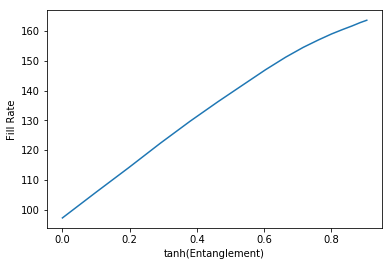

In [101]:
tan_gamma = np.tanh(gamma)
plt.plot(tan_gamma, fr_1_arr)
plt.xlabel("tanh(Entanglement)")
plt.ylabel("Fill Rate")
plt.show()

#### Adaptive Gamma

- In this section, we keep the gamma for player 2 as a constant value and then change the gamma of the player1 based on the ratio of past shortage cost by holding cost.

In [54]:
def adaptive_origin(ent):
    #policy_selected='L'

    
    q1_quant = [0]*sample_size
    g1_quant = [0]*sample_size
    g2_quant = [0]*sample_size
    holding1 = [0]*sample_size
    holding2 = [0]*sample_size
    shortage1 = [0]*sample_size
    shortage2 = [0]*sample_size
    
    q2_quant = d2*np.cosh(ent)+d1*np.sinh(ent)
    
    for cc in range(sample_size):
        if cc < 31:
            q1_quant[cc] = d1[cc]*np.cosh(ent)+d2[cc]*np.sinh(ent)
            
            if policy_selected=='P':
                g1_quant[cc] = proportional(q1_quant[cc],q2_quant[cc])
                g2_quant[cc] = proportional(q2_quant[cc],q1_quant[cc])

            if policy_selected=='L':
                g1_quant[cc] = linear(q1_quant[cc],q2_quant[cc])[0]
                g2_quant[cc] = linear(q1_quant[cc],q2_quant[cc])[1]

            if policy_selected=='U':
                g1_quant[cc] = uniform(q1_quant[cc],q2_quant[cc])[0]
                g2_quant[cc] = uniform(q1_quant[cc],q2_quant[cc])[1]

            if policy_selected=='R':
                g1_quant[cc] = relaxed_linear(q1_quant[cc],q2_quant[cc])[0]
                g2_quant[cc] = relaxed_linear(q1_quant[cc],q2_quant[cc])[1]

            if policy_selected=='Lx':
                g1_quant[cc] = lexicographic(q1_quant[cc],q2_quant[cc])[0]
                g2_quant[cc] = lexicographic(q1_quant[cc],q2_quant[cc])[1]

        else:
            
            balance1=g1_quant - d1
            holding1 = [sum(balance1[:j+1]) if sum(balance1[:j+1]) > 0 else 0 for j in range(cc)]
            shortage1 = [sum(balance1[:j+1]) if sum(balance1[:j+1]) < 0 else 0 for j in range(cc)] #Not LOST Sales
            holding1_avr = sum(holding1)/cc
            shortage1_avr = -1*sum(shortage1)/cc
            
            if holding1_avr == 0:
                correct = 1
            else:
                correct = (shortage1_avr * s) / (holding1_avr * h)
            
                
            adaptive_ent = ent * correct
            #print(correct)
            
            if adaptive_ent > np.pi/3:
                adaptive_ent = np.pi/3
            
            
            q1_quant[cc] = d1[cc]*np.cosh(adaptive_ent)+d2[cc]*np.sinh(adaptive_ent)
            
                        
            if policy_selected=='P':
                g1_quant[cc] = proportional(q1_quant[cc],q2_quant[cc])
                g2_quant[cc] = proportional(q2_quant[cc],q1_quant[cc])

            if policy_selected=='L':
                g1_quant[cc] = linear(q1_quant[cc],q2_quant[cc])[0]
                g2_quant[cc] = linear(q1_quant[cc],q2_quant[cc])[1]

            if policy_selected=='U':
                g1_quant[cc] = uniform(q1_quant[cc],q2_quant[cc])[0]
                g2_quant[cc] = uniform(q1_quant[cc],q2_quant[cc])[1]

            if policy_selected=='R':
                g1_quant[cc] = relaxed_linear(q1_quant[cc],q2_quant[cc])[0]
                g2_quant[cc] = relaxed_linear(q1_quant[cc],q2_quant[cc])[1]

            if policy_selected=='Lx':
                g1_quant[cc] = lexicographic(q1_quant[cc],q2_quant[cc])[0]
                g2_quant[cc] = lexicographic(q1_quant[cc],q2_quant[cc])[1]

                
                
    fr_quant_1 = round(sum(g1_quant)/sum(d1)*100,1)
    fr_quant_2 = round(sum(g2_quant)/sum(d2)*100,1)
    
    #fr_quant_1 = round(sum(g1_quant)/sum(order1)*100,1)
    #fr_quant_2 = round(sum(g2_quant)/sum(order2)*100,1)
    
    balance1=g1_quant - d1
    holding1 = [sum(balance1[:j+1]) if sum(balance1[:j+1]) > 0 else 0 for j in range(len(balance1))]
    shortage1 = [sum(balance1[:j+1]) if sum(balance1[:j+1]) < 0 else 0 for j in range(len(balance1))] #Not LOST Sales
    holding1_avr = sum(holding1)/sample_size
    shortage1_avr = -1*sum(shortage1)/sample_size
    
    balance2=g2_quant - d2
    holding2 = [sum(balance2[:j+1]) if sum(balance2[:j+1]) > 0 else 0 for j in range(len(balance2))]
    shortage2 = [sum(balance2[:j+1]) if sum(balance2[:j+1]) < 0 else 0 for j in range(len(balance2))] #Not LOST Sales
    holding2_avr = sum(holding2)/sample_size
    shortage2_avr = -1*sum(shortage2)/sample_size
    
    sale1_avr = min(sum(g1_quant),sum(d1))/sample_size     #Our case is not lost sales. So, the total sum is compared.
    sale2_avr = min(sum(g2_quant),sum(d2))/sample_size

    profit1_quant_avr = round(sale1_avr*p - (sum(g1_quant)/sample_size)*w - shortage1_avr*s - holding1_avr*h,0)
    profit2_quant_avr = round(sale2_avr*p - (sum(g2_quant)/sample_size)*w - shortage2_avr*s - holding2_avr*h,0)

    
    return fr_quant_1, shortage1_avr*s, holding1_avr*h, profit1_quant_avr, fr_quant_2, shortage2_avr*s, holding2_avr*h, profit2_quant_avr

In [55]:
k=100

gamma = np.arange(0, np.pi/3, 0.1)
result = []
m=9
n=5
result=[[0] * m for i in range(n)]  #creating n*m dimensions list in Python
nn=0

for policy_selected in policy:
    print(policy_selected)
    fr_1_arr = [0]*len(gamma)
    short1_arr = [0]*len(gamma)
    holding1_arr = [0]*len(gamma)
    profit1_arr = [0]*len(gamma)
    fr_2_arr = [0]*len(gamma)
    short2_arr = [0]*len(gamma)
    holding2_arr = [0]*len(gamma)
    profit2_arr = [0]*len(gamma)
    i=0
    
    #quant1=1
    #quant2=1

    
    for ent in gamma:
        fr_1_arr[i], short1_arr[i], holding1_arr[i], profit1_arr[i], fr_2_arr[i], short2_arr[i], holding2_arr[i], profit2_arr[i] = adaptive_origin(ent)
        i=i+1
    
    result[nn][0] = policy_selected
    result[nn][1] = fr_1_arr
    result[nn][2] = short1_arr
    result[nn][3] = holding1_arr
    result[nn][4] = profit1_arr
    
    result[nn][5] = fr_2_arr
    result[nn][6] = short2_arr
    result[nn][7] = holding2_arr
    result[nn][8] = profit2_arr
    
    nn=nn+1

P
L
U
R
Lx


In [88]:
item = 1
y_no = 2 # 'P': 0, 'L': 1, 'U': 2,

horzontal_line_100 = 0

consider_minmax = 1
y_min = 50
y_max = 102

%run Bokeh_Adaptive.ipynb

Loading BokehJS ...

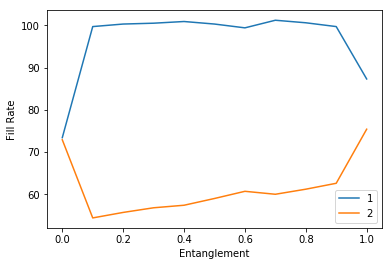

In [58]:
pol = policy_selector('L')

plt.plot(gamma, result[pol][1], label='1')
plt.plot(gamma, result[pol][5], label='2')

plt.xlabel("Entanglement")
plt.ylabel("Fill Rate")
plt.legend()
plt.show()

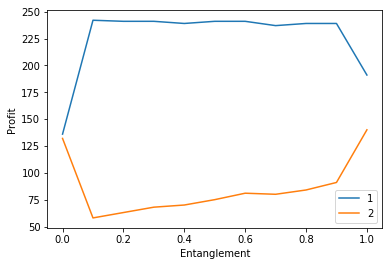

In [57]:
pol = policy_selector('L')

plt.plot(gamma, result[pol][4], label='1')
plt.plot(gamma, result[pol][8], label='2')

plt.xlabel("Entanglement")
plt.ylabel("Profit")
plt.legend()
plt.show()

In [106]:
fr1,sh1,hl1,pr1,fr2,sh2,hl2,pr2 = adaptive_origin(0.2)

In [107]:
print(fr1,fr2)

100.0 46.9


In [108]:
print(pr1,pr2)

1094575.0 521937.0


- k=100, if we get the demand k*1.2, then shortages are higher than holdings ...
- For k*0.8, holding will be higher and thus the resulting fill rate becomes 100%